<a href="https://colab.research.google.com/github/fattahar/ML-Sem-7-2025/blob/midterm_ML/midterm_regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install gdown

# 1. Download Dataset

In [12]:
import gdown

gdown.download("https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9")

Downloading...
From (original): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9
From (redirected): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9&confirm=t&uuid=ee500bd6-39ae-4fe2-a961-e4c00b2de2f7
To: /content/midterm-regresi-dataset.csv

  0%|          | 0.00/443M [00:00<?, ?B/s]
  4%|▍         | 17.3M/443M [00:00<00:02, 172MB/s]
  8%|▊         | 35.7M/443M [00:00<00:02, 178MB/s]
 12%|█▏        | 55.1M/443M [00:00<00:02, 185MB/s]
 19%|█▉        | 83.4M/443M [00:00<00:01, 222MB/s]
 24%|██▍       | 106M/443M [00:00<00:01, 199MB/s] 
 28%|██▊       | 126M/443M [00:00<00:01, 186MB/s]
 33%|███▎      | 146M/443M [00:00<00:01, 187MB/s]
 37%|███▋      | 165M/443M [00:00<00:01, 176MB/s]
 41%|████▏     | 183M/443M [00:00<00:01, 174MB/s]
 46%|████▌     | 202M/443M [00:01<00:01, 178MB/s]
 51%|█████     | 225M/443M [00:01<00:01, 192MB/s]
 55%|█████▌    | 244M/443M [00:01<00:01, 191MB/s]
 59%|█████▉    | 264M/443M [00:01<00:00, 190MB/s]
 64%|██████▍   | 284M/443M 

'midterm-regresi-dataset.csv'

# 2. Import Library

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 3. Read Data

In [14]:
file_path = 'midterm-regresi-dataset.csv'

print("Membaca dataset...")
try:
    # PENTING: Dataset audio ini biasanya tidak punya Header (Judul Kolom).
    # Kita wajib pakai header=None agar baris pertama (data 2001) tidak dianggap judul.
    df = pd.read_csv(file_path, header=None)
    print(f"✅ Data berhasil diload! Ukuran: {df.shape}")

    # Cek 5 baris pertama
    display(df.head())

except FileNotFoundError:
    print(f"❌ File '{file_path}' tidak ditemukan.")
    print("Pastikan kamu sudah upload file atau jalankan gdown!")

Membaca dataset...
✅ Data berhasil diload! Ukuran: (515345, 91)


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [15]:
import os
file_size_bytes = os.path.getsize(file_path)
file_size_mb = file_size_bytes / (1024 ** 2)

print(f"Ukuran file: {file_size_bytes:,} bytes")
print(f"Ukuran file: {file_size_mb:.2f} MB")  #ukuran 422.88 MB, deadline 2 minggu. ngerjain mepet pasti ga kelar :))))

Ukuran file: 443,423,087 bytes
Ukuran file: 422.88 MB


# 4. Preprocessing (Split & Scaling)

In [11]:
# Pisahkan Target (Kolom 0) dan Fitur (Kolom 1 sampai akhir)
X = df.iloc[:, 1:].values  # Fitur Audio
y = df.iloc[:, 0].values   # Target (Tahun Rilis)

print(f"Rentang Tahun: {y.min()} s.d {y.max()}")

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling (Standarisasi) - WAJIB untuk data Audio
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data siap dilatih (sudah discaling).")

Rentang Tahun: 1922 s.d 2011
✅ Data siap dilatih (sudah discaling).


# 5.  Training Model

In [19]:
# 3. Training Model (Revisi: Random Forest dengan Batas Depth)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Model 1: Linear Regression (Baseline)
print("\n🚀 1. Sedang melatih Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
print("✅ Linear Regression Selesai.")

# Model 2: Random Forest Regressor (Optimized)
print("\n🚀 2. Sedang melatih Random Forest (Full Data)...")

# Kita tambahkan parameter 'max_depth=10'
# Ini memaksa pohon tidak tumbuh terlalu rimbun, sehingga training ngebut.
rf_model = RandomForestRegressor(
    n_estimators=20,      # Turunkan sedikit ke 20 pohon (sudah cukup untuk tugas)
    max_depth=10,         # <--- KUNCI AGAR TIDAK STUCK (Membatasi kedalaman)
    n_jobs=-1,            # Pakai semua core
    random_state=42,
    verbose=2
)

rf_model.fit(X_train_scaled, y_train)
print("✅ Random Forest Selesai.")


🚀 1. Sedang melatih Linear Regression...
✅ Linear Regression Selesai.

🚀 2. Sedang melatih Random Forest (Full Data)...
building tree 1 of 20
building tree 2 of 20


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
✅ Random Forest Selesai.


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 11.2min finished


# 6. Evaluasi & Interpretasi

In [30]:
#Evaluasi Model
from sklearn.metrics import mean_squared_error, r2_score

def evaluasi(model, nama_model):
    print(f"--- Evaluasi {nama_model} ---")
    # Prediksi
    y_pred = model.predict(X_test_scaled)

    # Hitung Error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"RMSE (Rata-rata Meleset): {rmse:.2f} tahun")
    print(f"R2 Score (Akurasi Pola): {r2:.4f}")
    print("-" * 30)
    return y_pred

# Jalankan evaluasi
pred_lr = evaluasi(lr_model, "Linear Regression")
pred_rf = evaluasi(rf_model, "Random Forest")

# Simpan prediksi terbaik (biasanya Random Forest) untuk visualisasi
best_pred = pred_rf

--- Evaluasi Linear Regression ---
RMSE (Rata-rata Meleset): 9.52 tahun
R2 Score (Akurasi Pola): 0.2380
------------------------------
--- Evaluasi Random Forest ---


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


RMSE (Rata-rata Meleset): 9.40 tahun
R2 Score (Akurasi Pola): 0.2569
------------------------------


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.2s finished


# 7. Visualisasi

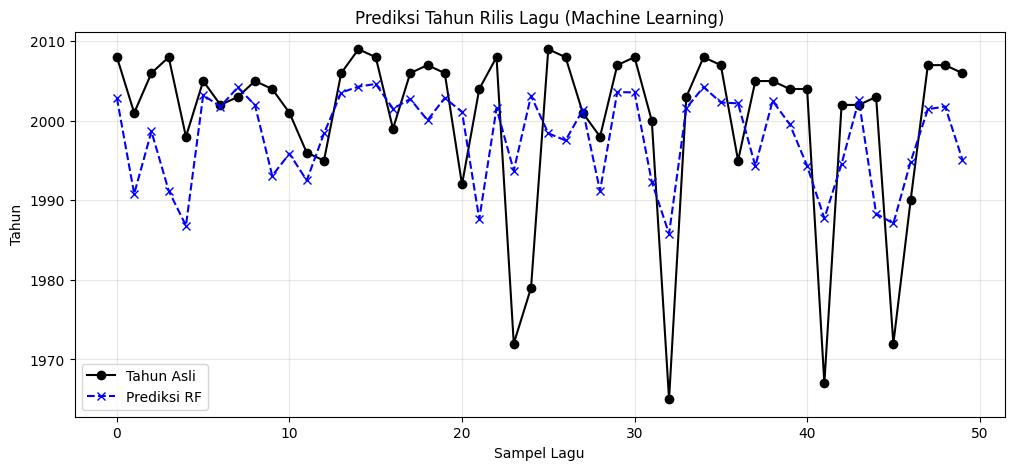

In [31]:
#Visualisasi Hasil (Random Forest)
plt.figure(figsize=(12, 5))

# Ambil 50 data pertama saja biar grafik terbaca
limit = 50
plt.plot(y_test[:limit], label='Tahun Asli', marker='o', color='black')
plt.plot(best_pred[:limit], label='Prediksi RF', linestyle='--', marker='x', color='blue')

plt.title('Prediksi Tahun Rilis Lagu (Machine Learning)')
plt.ylabel('Tahun')
plt.xlabel('Sampel Lagu')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()